# Лабораторная работа 6. Машинное  обучение  Scikit-learn

Загрузите дата-сет из файла data.xlsx.


In [10]:
import pandas as pd
import matplotlib.pylab as plt

er = pd.read_excel('data.xlsx',index_col=0)

Исправьте прочерки в некоторых ячейках. 

In [11]:
import warnings

warnings.filterwarnings('ignore')

er = er.replace('-',0)

vars = ['Количество купленных на матч билетов',
            'Дома или в гостях',
            'Место команды соперника в турнирной таблице выше середины или ниже',
            'Количество проведённых матчей за последнюю неделю',
            'Выиграли или проиграли предыдущую игру',
            'Положительная или отрицательная статистика игр с этой командой',
            'Данную игру выиграли или проиграли',
            'Играл или нет игрок Трус',
            'Коршунов',
            'Бадун',
            'Лисичкин',
            'Боярчук',
            'Жидких',
            'Марковский',
            'Дорофеев',
            'Ментюк',
            'Пасют',
            'Лаакконен',
            'Широков',
            'Марченко',
            'Ремезов',
            'А.Малявко',
            'С.Малявко',
            'Дадонов',
            'Степанов',
            'Шевченко',
            'Казнадей',
            'Осипов',
            'Саманьков',
            'Грецкий',
            'Кислый',
            'Горбаченко',
            'Безайс',
            'Брикун',
            'Стефанович',
]
er.columns = vars  # update column names to make them more informative
x_var = er.tail(1).drop(columns=['Данную игру выиграли или проиграли']) # select the test(25th) row
er = er[:-1]  # skip 25th row (the reason was described in cell below)
er.head()

Количество купленных на матч билетов  Дома или в гостях  \
Матч                                                            
1                                     1130                  0   
2                                      700                  0   
3                                     1557                  1   
4                                     1010                  1   
5                                     1209                  1   

      Место команды соперника в турнирной таблице выше середины или ниже  \
Матч                                                                       
1                                                     0                    
2                                                     0                    
3                                                     0                    
4                                                     0                    
5                                                     0                    

      Количество проведённых матчей за последнюю неделю  \
Матч                                                      
1                                                     0   
2                                                     1   
3                                                     2   
4                                                     2   
5                                                     3   

      Выиграли или проиграли предыдущую игру  \
Матч                                           
1                                          0   
2                                          1   
3                                          0   
4                                          1   
5                                          1   

      Положительная или отрицательная статистика игр с этой командой  \
Матч                                                                   
1                                                     0                
2                                                     0                
3                                                     0                
4                                                     0                
5                                                     1                

      Данную игру выиграли или проиграли  Играл или нет игрок Трус  Коршунов  \
Матч                                                                           
1                                    1.0                         1         1   
2                                    0.0                         1         1   
3                                    1.0                         0         1   
4                                    1.0                         1         1   
5                                    1.0                         1         1   

      Бадун     ...      Шевченко  Казнадей  Осипов  Саманьков  Грецкий  \
Матч            ...                                                       
1         1     ...             1         1       0          0        0   
2         1     ...             1         1       0          0        0   
3         1     ...             1         1       1          1        0   
4         1     ...             1         1       0          0        1   
5         1     ...             1         1       0          0        1   

      Кислый  Горбаченко  Безайс  Брикун  Стефанович  
Матч                                                  
1          0           0       0       0           0  
2          0           0       0       0           0  
3          0           0       0       0           0  
4          0           0       0       0           0  
5          0           0       0       0           0  

[5 rows x 35 columns]

Теперь создадим y и X для тренировки моделей: y (выигрыш\проигрыш) - то, что будем предсказывать, X (все остальные переменые) - по чему будем предсказывать. 

In [12]:
y = er['Данную игру выиграли или проиграли']
X = er.drop(columns=['Данную игру выиграли или проиграли'])

Создадим список с моделями, которые будем тестировать и потренируем их. Используем первые 24 строки. В 25й строке записан проверочный тест. 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression().fit(X, y)
lr_pred = lr.predict(x_var)

rfc = RandomForestClassifier().fit(X, y)
rfc_pred = rfc.predict(x_var)

gbc = GradientBoostingClassifier().fit(X, y)
gbc_pred = gbc.predict(x_var)

nbc = GaussianNB().fit(X, y)
nbc_pred = nbc.predict(x_var)

knc = KNeighborsClassifier().fit(X, y)
knc_pred = knc.predict(x_var)

print("Logistic Regression score: {}%, prediction result: {}".format(lr.score(X, y) * 100,lr_pred[0]))
print("Random Forest Classifier score: {}%, prediction result: {}".format(rfc.score(X, y) * 100,rfc_pred[0]))
print("Gradient Boosting Classifier score: {}%, prediction result: {}".format(gbc.score(X, y) * 100,gbc_pred[0]))
print("GaussianNB score: {}%, prediction result: {}".format(nbc.score(X, y) * 100,nbc_pred[0]))
print("KNeighbors score: {}%, prediction result: {}".format(knc.score(X, y) * 100,knc_pred[0]))

Logistic Regression score: 87.5%, prediction result: 1.0
Random Forest Classifier score: 100.0%, prediction result: 1.0
Gradient Boosting Classifier score: 100.0%, prediction result: 0.0
GaussianNB score: 91.66666666666666%, prediction result: 1.0
KNeighbors score: 87.5%, prediction result: 1.0


Далее выведем кривые-ошибок.

In [14]:
%matplotlib inline

"""
There are multiple ways how to visualize model's score(accuracy) or losses curve.
I'll use `valudation_curve` to plot training scores both with cross-validation scores.

Perhaps, It's better to plot losses, but regard that we use different estimators - 
and It's hard to retrieve losses directly from each model (e.g. Not all models have .losses attribute/getter)
"""
import numpy as np
from sklearn.model_selection import validation_curve


def plot_validation_curve(estimator, param_name="C",
                          title='', param_range=np.linspace(0.1, 35, 5)):
    plt.figure(figsize=(8, 7))
    plt.title(title)
    plt.xlabel("Training Epochs")
    plt.ylabel("Score")
    
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=5, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("{} Validation Curve".format(title))
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
    # fill out the space between mean and actual score values (deviation)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.grid()
    return plt

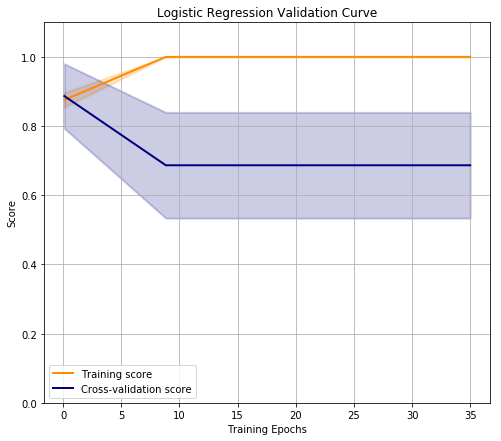

In [15]:
plot_validation_curve(lr, 'C', 'Logistic Regression')
plt.show()

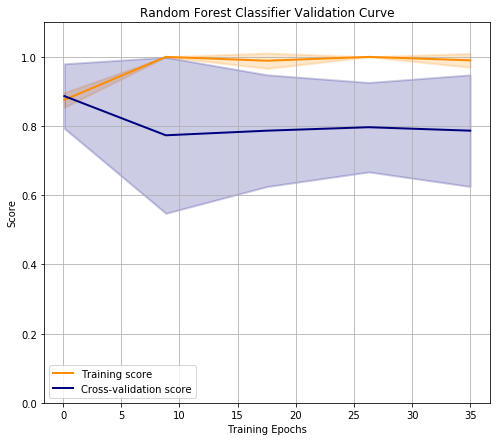

In [16]:
plot_validation_curve(rfc, 'max_depth', 'Random Forest Classifier')
plt.show()

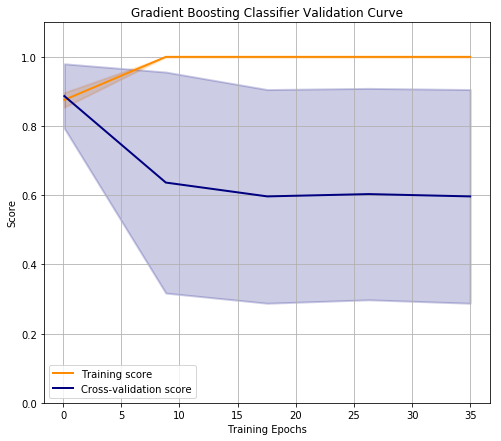

In [17]:
plot_validation_curve(gbc, 'max_depth', 'Gradient Boosting Classifier')
plt.show()

In [18]:
plot_validation_curve(nbc, 'var_smoothing', 'GaussianNB')
plt.show()

ValueError: Invalid parameter var_smoothing for estimator GaussianNB(priors=None). Check the list of available parameters with `estimator.get_params().keys()`.

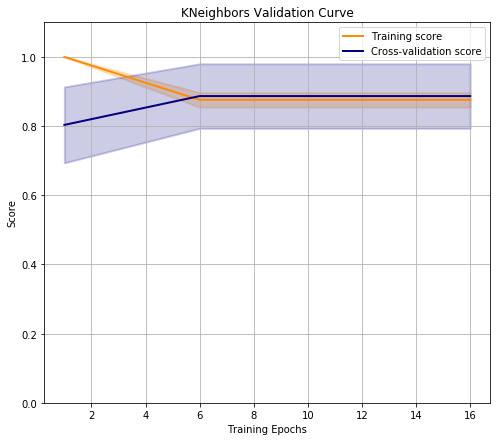

In [19]:
plot_validation_curve(knc, 'n_neighbors', 'KNeighbors', param_range=np.arange(1, 18, 5))
plt.show()

Сделайте вывод. 

In [20]:
"""
1) Naive Bayes Classifier is the most accurate classifier of all proposed to solve current issue.
2) Gradient Boosting Classifier is definitely the improper classifier for solving current issue
3) Logistic Regression, Random Forest Classifier, KNeighbors Classifier - all of them
   can be implemented as classifiers for this issue after more detailed investigation of the theory.
"""

'\n1) Naive Bayes Classifier is the most accurate classifier of all proposed to solve current issue.\n2) Gradient Boosting Classifier is definitely the improper classifier for solving current issue\n3) Logistic Regression, Random Forest Classifier, KNeighbors Classifier - all of them\n   can be implemented as classifiers for this issue after more detailed investigation of the theory.\n'

Сделаю функцию, которая будет выводить 100% stacked bar chart, чтобы увидеть тенденции. 

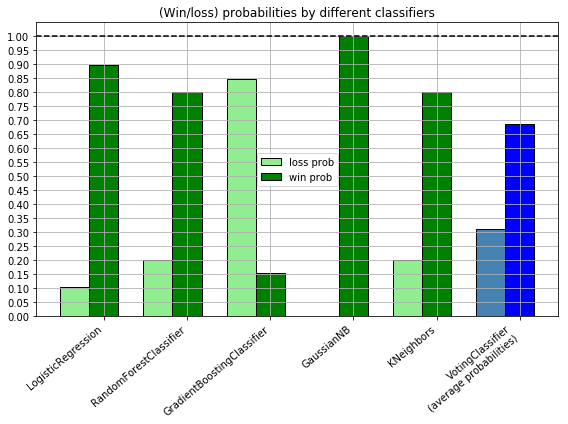

In [21]:
from sklearn.ensemble import VotingClassifier


def plot_stacked_bar_chart(estimators, weights, headers):
    vc = VotingClassifier(estimators=estimators,
                          weights=weights,
                          voting='soft').fit(X, y)

    plot_estimators = [estim[1] for estim in estimators]
    plot_estimators.append(vc)
    headers.append('VotingClassifier\n(average probabilities)')
    
    probs = [c.predict_proba(x_var) for c in plot_estimators]
    loss_probs = [pr[0, 0] for pr in probs]
    win_probs = [pr[0, 1] for pr in probs]

    num_estimators = len(plot_estimators)
    ind = np.arange(num_estimators)
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(8, 6))
    # bars for classifier 1-5
    p1 = ax.bar(ind, np.hstack(([loss_probs[:-1], [0]])), bar_width,
                color='lightgreen', edgecolor='k')
    p2 = ax.bar(ind + bar_width, np.hstack(([win_probs[:-1], [0]])), bar_width,
                color='green', edgecolor='k')
    # bars for VotingClassifier
    p3 = ax.bar(ind, [0, 0, 0, 0, 0, loss_probs[-1]], bar_width,
                color='steelblue', edgecolor='k')
    p4 = ax.bar(ind + bar_width, [0, 0, 0, 0, 0, win_probs[-1]], bar_width,
                color='blue', edgecolor='k')
    # plot annotations
    plt.axhline(1, color='k', linestyle='dashed')
    ax.yaxis.set_ticks(np.arange(0, 1.05, 0.05))
    ax.set_xticks(ind + bar_width)
    ax.set_xticklabels(headers,
                       rotation=40,
                       ha='right')
    plt.ylim([0, 1.05])
    plt.title('(Win/loss) probabilities by different classifiers')
    plt.legend([p1[0], p2[0]], ['loss prob', 'win prob'], loc='best')
    plt.grid()
    plt.tight_layout()

    return plt

classes = [('lr', lr), ('rfc', rfc), ('gbc', gbc), ('nbc', nbc), ('knc', knc)]
plot_headers = ['LogisticRegression',
                'RandomForestClassifier',
                'GradientBoostingClassifier',
                'GaussianNB',
                'KNeighbors'
               ]
weights = [1, 1, 1, 1, 1]

plot_stacked_bar_chart(estimators=classes, weights=weights, headers=plot_headers)
plt.show()

Вызовите функцию для каждой из ситуаций. 

1) Количество купленных на матч билетов 

2) Дома(1) или в гостях(0)

3) Место команды соперника в турнирной таблице выше середины(0) или ниже(1)

4) Количество проведённых матчей за последнюю неделю

5) Выиграли(1) или проиграли(0) предыдущую игру

6) Положительная(1) или отрицательная(0) статистика игр с этой командой

7) Данную игру выиграли(1) или проиграли (0)

8) Играл(1) или нет(0) игрок Выборочно, наиболее интересные


In [22]:
def get_column(colname=''):
    result = pd.DataFrame()
    try:
        if colname:
            result = er[colname]
    finally:
        return result

In [23]:
get_column('Количество купленных на матч билетов')

Матч
1     1130
2      700
3     1557
4     1010
5     1209
6      561
7      150
8     1500
9      119
10     580
11    1204
12     680
13     810
14     228
15    2380
16     500
17     180
18    4850
19    1142
20    1003
21     793
22     652
23     676
24    1100
Name: Количество купленных на матч билетов, dtype: int64

In [24]:
get_column('Место команды соперника в турнирной таблице выше середины или ниже')
# OK

Матч
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    1
17    1
18    0
19    1
20    0
21    1
22    1
23    0
24    0
Name: Место команды соперника в турнирной таблице выше середины или ниже, dtype: int64

In [25]:
get_column('Место команды соперника в турнирной таблице выше середины или ниже')

Матч
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    1
17    1
18    0
19    1
20    0
21    1
22    1
23    0
24    0
Name: Место команды соперника в турнирной таблице выше середины или ниже, dtype: int64

In [26]:
get_column('Количество проведённых матчей за последнюю неделю')

Матч
1     0
2     1
3     2
4     2
5     3
6     3
7     3
8     3
9     3
10    2
11    1
12    2
13    2
14    2
15    2
16    3
17    3
18    3
19    3
20    3
21    0
22    1
23    2
24    2
Name: Количество проведённых матчей за последнюю неделю, dtype: int64

Сделайте вывод для каждого. 

In [27]:
get_column('Выиграли или проиграли предыдущую игру')

Матч
1     0
2     1
3     0
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    1
16    0
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
Name: Выиграли или проиграли предыдущую игру, dtype: int64

In [28]:
get_column('Положительная или отрицательная статистика игр с этой командой')
# Seems to be OK

Матч
1     0
2     0
3     0
4     0
5     1
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    1
17    1
18    0
19    1
20    0
21    1
22    1
23    1
24    1
Name: Положительная или отрицательная статистика игр с этой командой, dtype: int64

In [29]:
get_column('Данную игру выиграли или проиграли')

Матч
1     1.0
2     0.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    0.0
11    1.0
12    1.0
13    1.0
14    1.0
15    0.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
Name: Данную игру выиграли или проиграли, dtype: float64

In [30]:
get_column('Боярчук')

Матч
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
Name: Боярчук, dtype: int64

Учитывая незначительные критерии, изменим формулу для создания тестовых и тренировочных сетов, обучим модели заново и сравним с первыми.

In [32]:
er = pd.read_excel('data.xlsx',index_col=0)
er = er.replace('-',0)
er.columns = vars

for value in [0,1]:
    er = er.loc[:, (er != value).any()]
er = er[er.columns[er.max() < 2]] 

x_var = er.tail(1).drop(columns=['Данную игру выиграли или проиграли'])
er = er[:-1] 
y = er['Данную игру выиграли или проиграли']
X = er.drop(columns=['Данную игру выиграли или проиграли'])

lr = LogisticRegression().fit(X, y)
lr_pred = lr.predict(x_var)

rfc = RandomForestClassifier().fit(X, y)
rfc_pred = rfc.predict(x_var)

gbc = GradientBoostingClassifier().fit(X, y)
gbc_pred = gbc.predict(x_var)

nbc = GaussianNB().fit(X, y)
nbc_pred = nbc.predict(x_var)

knc = KNeighborsClassifier().fit(X, y)
knc_pred = knc.predict(x_var)

print("Logistic Regression score: {}%, prediction result: {}".format(lr.score(X, y) * 100,lr_pred[0]))
print("Random Forest Classifier score: {}%, prediction result: {}".format(rfc.score(X, y) * 100,rfc_pred[0]))
print("Gradient Boosting Classifier score: {}%, prediction result: {}".format(gbc.score(X, y) * 100,gbc_pred[0]))
print("GaussianNB score: {}%, prediction result: {}".format(nbc.score(X, y) * 100,nbc_pred[0]))
print("KNeighbors score: {}%, prediction result: {}".format(knc.score(X, y) * 100,knc_pred[0]))

Logistic Regression score: 87.5%, prediction result: 1.0
Random Forest Classifier score: 95.83333333333334%, prediction result: 1.0
Gradient Boosting Classifier score: 100.0%, prediction result: 1.0
GaussianNB score: 91.66666666666666%, prediction result: 1.0
KNeighbors score: 87.5%, prediction result: 1.0


Вывод.

In [33]:
"""
Gradient Boosting Classifier prediction is now positive.
Stats of other classifiers left unchanged.
"""

'\nGradient Boosting Classifier prediction is now positive.\nStats of other classifiers left unchanged.\n'

Подайте на функцию 25й проверочный тест. Запишите результат. 